In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
class Graph:
    def __init__(self):
        self.adjlist = dict()
        self.g = nx.Graph()
        
    def addedge(self, u, v):
        if u in self.adjlist:
            self.adjlist[u].append(v)
        else:
            self.adjlist[u] = [v]
        
        if v in self.adjlist:
            self.adjlist[v].append(u)
        else:
            self.adjlist[v] = [u]
            
        self.g.add_edge(u, v, weight=1)
        
    def visualize(self): 
        pos = nx.kamada_kawai_layout(self.g)
        nx.draw(self.g, pos=pos, with_labels=True, alpha=0.8)
        plt.show()

In [3]:
class PQueue:
    def __init__(self):
        self.queue = []
        
    def isEmpty(self):
        return len(self.queue) == 0
    
    def enqueue(self, ele, pri):
        self.queue.append((ele, pri))
    
    def dequeuemin(self):
        if self.isEmpty():
            return None, None
        
        minidx = None
        minpri = None
        for i in range(len(self.queue)):
            ele, pri = self.queue[i]
            
            if minpri == None or pri < minpri:
                minidx = i
                minpri = pri
        
        ele, pri = self.queue.pop(minidx)
        
        return ele, pri
    
    def dequeuemax(self):
        if self.isEmpty():
            return None, None
        
        maxidx = None
        maxpri = None
        for i in range(len(self.queue)):
            ele, pri = self.queue[i]
            
            if maxpri == None or pri > maxpri:
                maxidx = i
                maxpri = pri
        
        ele, pri = self.queue.pop(maxidx)
        
        return ele, pri

In [4]:
def heuristic(n):
    return n**2

def hillclimbsearch(graph, start):
    curr = start
    currheu = heuristic(start)
    
    while True:
        children = graph.adjlist[curr]
        
        q = PQueue()
        for child in children:
            q.enqueue(child, heuristic(child))
            
        child, heu = q.dequeuemin()
        
        if heu < currheu:
            curr = child
            currheu = heu
        else:
            return curr

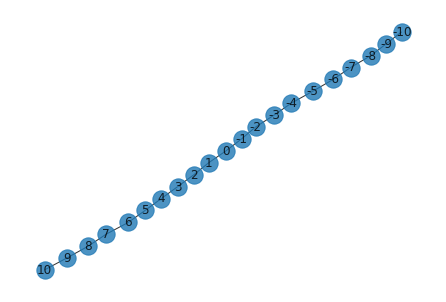

In [5]:
g = Graph()

for i in range(-9, 11):
    g.addedge(i, i-1)
    
g.visualize()

In [6]:
start = -10

maxnode = hillclimbsearch(g, start)

print(f"The node with minimum value for f(x) is {maxnode} from {start}.")

The node with minimum value for f(x) is 0 from -10.
